# Homework 3: This HW is based on the code for Lecture 7 (Gradient Descent).

## Instructions: 

Place the answer to your code only in the area specified. Also, make sure to run all your code, meaning, press >> to "Restart Kernel and Run All Cells". This should plot all outputs including your answers to homework questions. After this, go to file (top left) and select "Print". Save your file as a PDF and upload the PDF to Canvas.

# Question:

Try to a build a simple optimizer to minimize:

    f(w) = a[0] + a[1]*w + a[2]*w^2 + ... + a[d]*w^d
    
for the coefficients `a = [0,0.5,-2,0,1]`.

* Plot the function f(w) (2 points)
* Can you see where the minima is? (1 point)
* Write a function that outputs f(w) and its gradient (3 points).
* Run the optimizer on the function to see if it finds the minima (3 poimts).
* Print the funciton value and number of iterations (3 points).
* Instead of writing the function for a specific coefficient vector `a`, create a class that works for an arbitrary vector `a` (3 points).

You may wish to use the `poly.polyval(w,a)` method to evaluate the polynomial.

In [1]:
import numpy.polynomial.polynomial as poly
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1) Plot the function f(w)

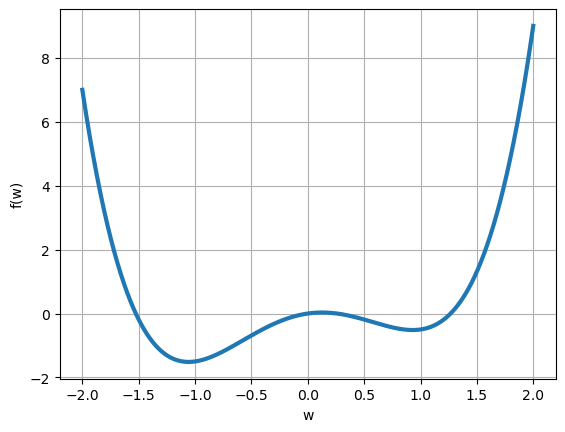

In [2]:
w = np.linspace(-2,2,1000000)
a = [0,0.5,-2,0,1]
fw = poly.polyval(w,a)
plt.plot(w,fw,'-',linewidth=3)
plt.xlabel('w')
plt.ylabel('f(w)')
plt.grid(True)

2) Can you see where the minima is?

In [3]:
print(f'The minima is at ({float(w[fw==min(fw)]):.4f}.,{min(fw):.4f})')

The minima is at (-1.0575.,-1.5148)


3) Write a function that outputs f(w) and its gradient

$$
f(w) = 0.5*w - 2*w^2 + w^4 \\
f'(w) = 0.5 - 4*w + 4w^3
$$

In [4]:
print([a[i] * i for i in range(1, len(a))]) # this is the way to get coefficients for derivates

[0.5, -4, 0, 4]


In [5]:
def feval(w):
    a=[0,0.5,-2,0,1]
    fw = poly.polyval(w,a)
    fgrad = poly.polyval(w,[a[i] * i for i in range(1, len(a))])  
    return fw, fgrad

4) Run the optimizer on the function to see if it finds the minima 

In [6]:
def grad_opt_sim(f, winit, lr=1e-3,nit=1000,tol=1e-10):
    """
    Simple gradient descent optimization
    
    f:  A function that returns f, fgrad, the objective
            function and its gradient
    winit:  Initial estimate
    lr:     learning rate
    nit:    Number of iterations
    tol:  tolerance to compare if value changes between iterations
    """
    
    # Initialize
    w0 = winit
    count = 0
  
    # Loop over iterations
    for it in range(nit):
        
        if it > 0:
            f0_prev = f0

        # Evaluate the function and gradient
        f0, fgrad0 = f(w0)
        
        # check if fw value not changing
        if it > 0:
            if abs(f0-f0_prev) < tol:
                count += 1
            else:
                count = 0
            
        if count > 5:
            break
        

        # Take a gradient step
        w0 = w0 - lr*fgrad0
        

    return w0, f0, it

In [7]:
min_x, min_y, it = grad_opt_sim(feval, winit=-2, lr=5e-4,nit=10000)

It seems like the optimizer could find the minima.

5. Print the funciton value and number of iterations

In [8]:
print(f'The minima is at ({min_x:.4f},{min_y:.4f}) at iteration # {it}.')

The minima is at (-1.0575,-1.5148) at iteration # 1916.


6. Instead of writing the function for a specific coefficient vector `a`, create a class that works for an arbitrary vector `a`

Class that works for an arbitrary vector `a`:

In [9]:
class polyFunc(object):
    def __init__(self,w):
        """
        Class to computes the gradient for polynomial
        
        The constructor takes w for training.
        """
        self.w = w

    def feval(self,a):
        fw = poly.polyval(self.w,a)
        fgrad = poly.polyval(self.w,[a[i] * i for i in range(1, len(a))])  
        return fw, fgrad

Implement `grad_opt_sim2` that works with class `a`:

In [10]:
def grad_opt_sim2(winit, lr=1e-3,nit=1000,tol=1e-10,a=[1,1]):
    """
    Simple gradient descent optimization

    winit:  Initial estimate
    lr:     learning rate
    nit:    Number of iterations
    tol:  tolerance to compare if value changes between iterations
    a:  list of coefficient parameters
    """
    
    poly_func = polyFunc(winit)
    
    # Initialize
    count = 0
  
    # Loop over iterations
    for it in range(nit):
        
        if it > 0:
            f0_prev = f0

        # Evaluate the function and gradient
        f0, fgrad0 = poly_func.feval(a)
        
        # check if fw value not changing
        if it > 0:
            if abs(f0-f0_prev) < tol:
                count += 1
            else:
                count = 0
            
        if count > 5:
            break
        

        # Take a gradient step
        poly_func.w = poly_func.w - lr*fgrad0
        

    return poly_func.w, f0, it

In [11]:
min_x, min_y, it = grad_opt_sim2(winit=-2, lr=5e-4,nit=10000,tol=1e-10,a=[0,0.5,-2,0,1])
print(f'The minima is at ({min_x:.4f},{min_y:.4f}) at iteration # {it}.')

The minima is at (-1.0575,-1.5148) at iteration # 1916.


Some test cases:

In [12]:
min_x, min_y, it = grad_opt_sim2(winit=-5, lr=5e-4,nit=10000,tol=1e-10,a=[0,1,1,3,5])
print(f'The minima is at ({min_x:.4f},{min_y:.4f}) at iteration # {it}.')

The minima is at (-0.4658,-0.3166) at iteration # 2462.


In [13]:
min_x, min_y, it = grad_opt_sim2(winit=-5, lr=5e-4,nit=10000,tol=1e-10,a=[0,1,5])
print(f'The minima is at ({min_x:.4f},{min_y:.4f}) at iteration # {it}.')

The minima is at (-0.1000,-0.0500) at iteration # 2321.
